# Example 6.14

- $x1 =$ an 8-point scale response to Question 1
- $x2 =$ an 8-point scale response to Question 2
- $x3 =$ a 5-point scale response to Question 3
- $x4 =$ a 5-point scale response to Question 4

- Population 1 = married men
- Population 2 = married women

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.linalg as la
from scipy import stats
from IPython.display import display, Math

In [ ]:
n1, n2 = 30, 30
p = 4

In [2]:
xbar1 = np.array([[6.833],[7.033],[3.967],[4.700]])  # Male
xbar2 = np.array([[6.633],[7.000],[4.000],[4.533]])  # Female

In [3]:
S_pooled = np.array([[.606, .262, .066, .161],
                     [.262, .637, .173, .143],
                     [.066, .173, .810, .029],
                     [.161, .143, .029, .306]])

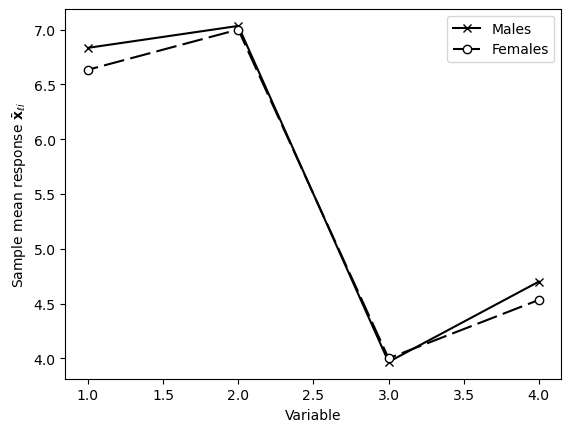

In [96]:
v = range(1,5)

# Plot Males.
plt.plot(v, xbar1, '-kx')

# Plot Females.
plt.plot(v, xbar2, linestyle=(5,(10,3)), color='k')  # Use a long dash with offset style.
plt.plot(v, xbar2, linestyle='none', marker='o', markerfacecolor='white', markeredgecolor='k')

# Create the legend.
custom_legend_plot1 = Line2D([0], [0], linestyle='solid',
                       color='black', marker='x', markerfacecolor='white', markeredgecolor='black', label='Males')
custom_legend_plot2 = Line2D([0], [0], linestyle=(5,(10,3)),
                       color='black', marker='o', markerfacecolor='white', markeredgecolor='black', label='Females')

plt.legend(handles=[custom_legend_plot1, custom_legend_plot2])

plt.xlabel('Variable')
plt.ylabel(r'Sample mean response $\bar{\mathbf{x}}_{\ell i}$')
plt.show()

## Test for parallel profiles for two normal populations

In [133]:
C1 = la.toeplitz([-1,0,0], [1,1,0,0])
C1

array([[-1,  1,  0,  0],
       [ 0, -1,  1,  0],
       [ 0,  0, -1,  1]])

In [213]:
T21 = (((xbar1 - xbar2).T @ C1.T) @ la.inv((1/n1 + 1/n2)* C1 @ S_pooled @ C1.T) @ (C1 @ (xbar1 - xbar2))).item()
display(Math(f'T_{1}^{2}'
             '='
             r'{(\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})}^{\prime} \textbf{C}_{1}'
             r'{\left( \left( \frac{1}{n_{1}} + \frac{1}{n_{2}} \right) \textbf{C}_{1} \textbf{S}_{\text{pooled}}  \textbf{C}_{1}^{\prime} \right)}^{-1}'
             r'{\textbf{C}_{1} (\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})}'
             '='
             f'{T21:.3f}'
             ))

<IPython.core.display.Math object>

In [169]:
const1 = ((n1+n2-2)*(p-1))/(n1+n2-p)
display(Math(r'\text{const}_{1}'
             '='
             r'\frac{(n_{1} - 1) + (n_{2} - 1)}{n_{1} + n_{2} - p}'
             '='
             fr'\frac{{ ({n1} - 1) + ({n2} - 1) }}{{ {n1} + {n2} - {p} }}'
             '='
             f'{const1:.2f}'
             ))

<IPython.core.display.Math object>

In [244]:
alpha = 0.05
f1 = stats.f.ppf(1 - alpha, dfn=p-1, dfd=n1 + n2 - p)
display(Math(r'F_{p-1, n_{1}+n_{2}-p}(\alpha)'
             '='
             fr'F_{{ {p-1}, {n1+n2-p} }}({alpha})'
             '='
             f'{f1:.2f}'
             ))

<IPython.core.display.Math object>

In [198]:
f_crit1 = const1 * f1
display(Math(r'c_{1}^{2}'
             '='
             r'\frac{(n_{1} - 1) + (n_{2} - 1)}{n_{1} + n_{2} - p} F_{p-1, n_{1}+n_{2}-p}(\alpha)'
             '='
             fr'\text{{const}}_{{1}} F_{{ {p-1}, {n1+n2-p} }}({alpha})'
             '='
             f'{const1:.2f} ({f1:.2f})'
             '='
             f'{f_crit1:.2f}'
             ))

<IPython.core.display.Math object>

In [249]:
if T21 > f_crit1:
    display(Math(fr'\text{{We have that }} T_{1}^{2} = {T21:.3f} > c_{{1}}^{{2}}'
                 '='
                 fr'\frac{{ ({n1} - 1) + ({n2} - 1) }}{{ {n1} + {n2} - {p} }} F_{{ {p-1}, {n1+n2-p} }}({alpha}) = '
                 fr'{f_crit1:.2f} \text{{, so we would reject the null hypothesis that }} '
                 r'H_{01}: \textbf{C}\bm{\mu}_{1} = \textbf{C}\bm{\mu}_{2} \text{, so profiles are not parallel}'
                 ))
else:
    display(Math(fr'\text{{We have that }} T_{1}^{2} = {T21:.3f} < c_{{1}}^{{2}}'
                 '='
                 fr'\frac{{ ({n1} - 1) + ({n2} - 1) }}{{ {n1} + {n2} - {p} }} F_{{ {p-1}, {n1+n2-p} }}({alpha}) = '
                 fr'{f_crit1:.2f} \text{{, so we would fail to reject the null hypothesis that }} '
                 r'H_{01}: \textbf{C}\bm{\mu}_{1} = \textbf{C}\bm{\mu}_{2} \text{, so profiles are parallel}'
                ))

<IPython.core.display.Math object>

## Test for coincident profiles, given that profiles are parallel

In [148]:
c2 = np.ones(p)[:,np.newaxis]
c2

array([[1.],
       [1.],
       [1.],
       [1.]])

In [228]:
T22 = ( c2.T @ (xbar1 - xbar2) @ la.inv((1/n1 + 1/n2) * c2.T @ S_pooled @ c2) @ c2.T @ (xbar1 - xbar2)).item()
display(Math(f'T_{1}^{2}'
             '='
             r'{(\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})}^{\prime} \textbf{C}_{2}'
             r'{\left( \left( \frac{1}{n_{1}} + \frac{1}{n_{2}} \right) \textbf{C}_{2} \textbf{S}_{\text{pooled}} \textbf{C}_{2}^{\prime} \right)}^{-1}'
             r'{\textbf{C}_{2} (\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})}'
             ))
display(Math('='
             r'{(\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})}^{\prime} \textbf{1}'
             r'{\left( \left( \frac{1}{n_{1}} + \frac{1}{n_{2}} \right) \textbf{1}^{\prime} \textbf{S}_{\text{pooled}} \textbf{1} \right)}^{-1}'
             r'\textbf{1}^{\prime} (\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})'
             '='
             ))
display(Math('='
             r'\textbf{1}^{\prime} (\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})'
             r'{\left( \left( \frac{1}{n_{1}} + \frac{1}{n_{2}} \right) \textbf{1}^{\prime} \textbf{S}_{\text{pooled}} \textbf{1} \right)}^{-1}'
             r'\textbf{1}^{\prime} (\bar{\textbf{x}}_{1} - \bar{\textbf{x}}_{2})'
             '='
             f'{T22:.3f}'
             ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
const2 = ((n1+n2-2)*(p-1))/(n1+n2-p)
display(Math(r'\text{const}_{1}'
             '='
             r'\frac{(n_{1} - 1) + (n_{2} - 1)}{n_{1} + n_{2} - p}'
             '='
             fr'\frac{{ ({n1} - 1) + ({n2} - 1) }}{{ {n1} + {n2} - {p} }}'
             '='
             f'{const1:.2f}'
             ))

array([[0.50169729]])

In [253]:
f_crit2 = stats.f.ppf(1 - alpha, dfn=1, dfd=n1 + n2 - 2)
display(Math(r'F_{1, (n_{1}-1)+(n_{2}-1)}(\alpha)'
             '='
             fr'F_{{ {1}, {n1+n2-2} }}({alpha})'
             '='
             f'{f_crit2:.2f}'
             ))

<IPython.core.display.Math object>

In [ ]:
# Alternatively, could do a t-value and square it.
t_crit2 = stats.t.ppf(1-alpha/2, df=n1 + n2 - 2)**2
t_crit2
display(Math(r't_{(n_{1}-1)+(n_{2}-1)}^{2}\left(\frac{\alpha}{2}\right)'
             '='
             fr't_{{{n1+n2-2} }}^{2}({alpha/2})'
             '='
             f'{t_crit2:.2f}'
             ))

<IPython.core.display.Math object>

In [263]:
# Check that they both F and t critical values are close.
assert np.allclose(t_crit2, f_crit2)

In [252]:
if T21 > f_crit1:
    display(Math(fr'\text{{We have that }} T_{2}^{2} = {T22:.3f} > c_{{2}}^{{2}} = F_{{ 1, {n1+n2-2} }}({alpha}) = '
                 fr'{f_crit2:.2f} \text{{, so we would reject the null hypothesis that }} '
                 r'H_{02}: \textbf{1}^{\prime}\bm{\mu}_{1} = \textbf{1}^{\prime}\bm{\mu}_{2} \text{, so profiles are not coincident}'
                 ))
else:
    display(Math(fr'\text{{We have that }} T_{2}^{2} = {T22:.3f} < c_{{2}}^{{2}} = F_{{ 1, {n1+n2-2} }}({alpha}) = '
                 fr'{f_crit2:.2f} \text{{, so we would fail to reject the null hypothesis that }} '
                 r'H_{02}: \textbf{1}^{\prime}\bm{\mu}_{1} = \textbf{1}^{\prime}\bm{\mu}_{2} \text{, so profiles are coincident}'
                ))

<IPython.core.display.Math object>